In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# EDA and Preprocessing

In [2]:
import pandas as pd

# Specify the file path of the CSV file
file_path = '/content/gdrive/MyDrive/dataa.xlsx'

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_excel(file_path)
    # Do further processing or analysis on the DataFrame as needed

    df.head()  # Print the first few rows of the DataFrame for verification

except pd.errors.ParserError as e:
    print(f"Error occurred while parsing the CSV file: {e}")

except FileNotFoundError:
    print(f"CSV file not found at the specified file path: {file_path}")

In [3]:
df.head()

,reviews,Tangibles,Reliability,Empathy,Assurance,Responsiveness
0,اتاق ها خیلی معمولی، پرسنل بی اعصاب، صبحانه مع...,0,2.0,2,-1,2
1,هتل با توجه به قیمت و تبلیغات بالا راضی کننده...,-1,-1.0,2,-1,2
2,کارکنان بسیار خوب و مودب,2,2.0,2,1,2
3,اتاقش خیلی خوب بود دلباز و تمیز، من چون گرمایی...,1,2.0,2,2,2
4,برخورد پرسنل هتل عالی بود.موسیقی زنده در کافی ...,1,2.0,2,1,2


In [4]:
df.count()

reviews           2558
Tangibles         2558
Reliability       2557
Empathy           2558
Assurance         2558
Responsiveness    2558
dtype: int64

In [5]:
if 'google.colab' in str(get_ipython()):
  !pip install hazm numpy==1.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.5/367.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 76.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of hazm to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.8/352.8 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394472 sha256=b1404cecd403a39fa1f89316481836a9fe1e00bfbfb026291db8

In [6]:
df.shape

(2558, 6)

In [7]:
df.duplicated().sum()

5

In [8]:
df.isna().sum()

reviews           0
Tangibles         0
Reliability       1
Empathy           0
Assurance         0
Responsiveness    0
dtype: int64

In [9]:
# Display the number of duplicated records
num_duplicates = df.duplicated().sum()
print("Number of duplicate records:", num_duplicates)

# Display the number of NaN values in each column
nan_counts = df.isna().sum().sum()
print("NaN value counts in each column:", (nan_counts))

Number of duplicate records: 5
NaN value counts in each column: 1


In [10]:
# Remove rows with NaN values
df = df.dropna()

# Remove duplicate records
import pandas as pd

# Assuming you have already loaded your DataFrame as 'df'
# df = ...

# Calculate the mode of the 'Reliability' column
reliability_mode = df['Reliability'].mode()[0]

# Fill NaN values in the 'Reliability' column with its mode
df['Reliability'].fillna(reliability_mode, inplace=True)

# Display the number of duplicated records
num_duplicates = df.duplicated().sum()
print("Number of duplicate records:", num_duplicates)

# Display the number of NaN values in each column
nan_counts = df.isna().sum().sum()
print("NaN value counts in each column:", (nan_counts))

Number of duplicate records: 5
NaN value counts in each column: 0


<ipython-input-10-f11e4197f30b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reliability'].fillna(reliability_mode, inplace=True)


In [11]:
pd.set_option('display.max_rows', 10)

df.head(10)

,reviews,Tangibles,Reliability,Empathy,Assurance,Responsiveness
0,اتاق ها خیلی معمولی، پرسنل بی اعصاب، صبحانه مع...,0,2.0,2,-1,2
1,هتل با توجه به قیمت و تبلیغات بالا راضی کننده...,-1,-1.0,2,-1,2
2,کارکنان بسیار خوب و مودب,2,2.0,2,1,2
3,اتاقش خیلی خوب بود دلباز و تمیز، من چون گرمایی...,1,2.0,2,2,2
4,برخورد پرسنل هتل عالی بود.موسیقی زنده در کافی ...,1,2.0,2,1,2
5,من به آقایی که وسایلو می خواست داخل اتاق بیار...,2,2.0,-1,2,2
6,هتل بسیار خوب و مناسبیه خیلی تمیزه!…ما که رضا...,1,2.0,2,2,2
7,محیط تمیز بود و غذاهای رستوران هم خوب بود ولی ...,-1,2.0,2,2,1
8,ارسال از کافی شاپ به اتاقها ندارین که خیلی تو...,-1,-1.0,2,2,2
9,عالییی فقط متاسفانه اجازه به کشیدن سیگار در ...,-1,2.0,2,2,2


# word/alphabet count/distribution

In [12]:
alphabet = set()

for _, row in df.iterrows():
    text = row['reviews']
    for char in text:
        alphabet.add(char)

In [13]:
len(alphabet)

166

In [14]:
import numpy as np

concatdf = df['reviews']
total_length = concatdf.str.len().sum()

alphdf = pd.DataFrame(list(alphabet), columns=['alphabet'])
alphdf['dist'] = np.zeros(len(alphdf))

for index, row in alphdf.iterrows():
    char = row['alphabet']
    if char in '.^$*+?()[{\|^-]\\':
        char = f'\\{char}' # escape special regex character
    alphdf.loc[index, 'dist'] = concatdf.str.count(char).sum() / total_length

In [15]:
pd.set_option('display.max_rows', 10)

alphdf_sorted = alphdf.sort_values(by='dist', ascending=False)
alphdf_sorted.head(10)

,alphabet,dist
23,,0.206629
72,ا,0.100971
82,ی,0.063770
157,و,0.056599
165,ر,0.055766
123,ه,0.050385
44,ت,0.049472
8,د,0.048949
84,ب,0.047237
52,ن,0.046329


In [16]:
#import os
file_path = '/content/gdrive/MyDrive/sentiment_farsi/export_alphabet_distribution.csv'
alphdf_sorted.to_csv(file_path)

## Other characters

In [17]:
import copy

ok_alphabet = ' ' 'ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی' 'ۀءآأؤإئة' '#'
# '0123456789' 'abcdefghijklmnopqrstuvwxyz' 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' '.?!,،:;'

other_alphabet = copy.copy(alphabet)

for char in ok_alphabet:
    if char in other_alphabet:
        other_alphabet.remove(char)

In [18]:
display("".join(sorted(other_alphabet)))

"!%'()+-./0123456789:=ACEFGIKMOPRSTVWX\\_abcdefghiklmnoprstuvwxy{}¥°،؛\u061c؟ـكىيًَُِّ٠١٢٣٤٥٦٧٨٩٪۰۱۲۳۴۵۶۷۸۹\u200c\u200d…🌷🌸🌹🌺🏻👈👌👍💐💫😁😂😅😊😍😕😭😳🙂🙄🙌🙏🥰🥴"

In [19]:
file_path = '/content/gdrive/MyDrive/sentiment_farsi/export_other_alphabet.csv'

with open(file_path, 'w') as fd:
    fd.write("".join(sorted(other_alphabet)))

In [20]:
alphabets=str(ok_alphabet)+str('ACEFGIKMOPRSTVWXabcdefghiklmnoprstuvwxy0123456789🌷🌸🌹🌺🏻👈👌👍💐💫😁😂😅😊😍😕😭😳🙂🙄🙌🙏🥰🥴')
alphabets

' ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهیۀءآأؤإئة#ACEFGIKMOPRSTVWXabcdefghiklmnoprstuvwxy0123456789🌷🌸🌹🌺🏻👈👌👍💐💫😁😂😅😊😍😕😭😳🙂🙄🙌🙏🥰🥴'

# Cleaning, normalizing and ...

In [21]:
# import nltk
# nltk.tokenize()
import hazm
import re

stop_words = hazm.stopwords_list()
normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()

In [22]:
# mappings
# EXTENDED ARABIC-INDIC DIGIT
mappings1 = [('۰', '0'), ('۱', '1'), ('۲', '2'), ('۳', '3'), ('۴', '4'), ('۵', '5'), ('۶', '6'), ('۷', '7'), ('۸', '8'), ('۹', '9')]

# ARABIC-INDIC DIGIT
mappings2 = [('٠', '0'), ('١', '1'), ('٢', '2'), ('٣', '3'), ('٤', '4'), ('٥', '5'), ('٦', '6'), ('٧', '7'), ('٨', '8'), ('٩', '9')]

# Equivalent letters
mappings3 = [
    ('ە', 'ه'), # ARABIC LETTER AE, ARABIC LETTER HEH
    ('ہ', 'ه'), # ARABIC LETTER HEH GOAL, ARABIC LETTER HEH
    ('ٸ', 'ی'), # ARABIC LETTER HIGH HAMZA YEH, ARABIC LETTER FARSI YEH
    ('ھ', 'ه'), # ARABIC LETTER HEH DOACHASHMEE, ARABIC LETTER HEH
    ('ى', 'ی'), # ARABIC LETTER ALEF MAKSURA, ARABIC LETTER FARSI YEH
    ('ں', 'ن'), # ARABIC LETTER NOON GHUNNA, ARABIC LETTER NOON
    ('ے', 'ی'), # ARABIC LETTER YEH BARREE, ARABIC LETTER FARSI YEH
]
ok_alphabets_list = list(ok_alphabet)

def preprocess(text, mappings):
    # replace specific phrases
    #text = text.replace(' ', ' ')

    # replace with mappings
    for x, y in mappings:
        text = text.replace(x, y)

    # Find and separate numbers attached to valid alphabets
    pattern = re.compile(r'(\d+)([' + ''.join(ok_alphabets_list) + r']+)')
    text = pattern.sub(r'\1 \2', text)
    # replace numbers and English chars with #
    #text = re.sub(r'[a-zA-Z0-9]+', '#', text)

    # filter out stop words
    text = " ".join([t for t in text.split()]) #if t not in stop_words])

    # keep words longer than 2
    #isnum = re.compile('^\d+$')
    #text = " ".join([t for t in text.split() if (len(t) > 2) or (re.match(isnum, t))])

    # remove text inside parantheses or brackets
    #text = re.sub(r'\([^)]*\)|\[[^\]]*\]', '', text)

    # filter out characters not in ok_alphabet
    text = "".join([t for t in text if t in alphabets])

    text = normalizer.normalize(text)

    text = lemmatizer.lemmatize(text)

    return text

# clean columns on dataframes

# method1, iterate rows
# def prep_loc(dataframes, columns, mappings):
#     for df in dataframes:
#         for index, row in df.iterrows():
#             for col in columns:
#                 text = row[col]
#                 text = preprocess(text, mappings)
#                 df.loc[index, col] = text

# prep_loc(dataframes=[traindf, testdf], columns=['article', 'summary'], mappings=mappings1+mappings2+mappings3)

# method2, use apply method
df['reviews1'] = df['reviews'].apply(lambda text: preprocess(text=text, mappings=mappings1+mappings2+mappings3))


In [23]:
df.head()

,reviews,Tangibles,Reliability,Empathy,Assurance,Responsiveness,reviews1
0,اتاق ها خیلی معمولی، پرسنل بی اعصاب، صبحانه مع...,0,2.0,2,-1,2,اتاق‌ها خیلی معمولی پرسنل بی اعصاب صبحانه معمو...
1,هتل با توجه به قیمت و تبلیغات بالا راضی کننده...,-1,-1.0,2,-1,2,هتل با توجه به قیمت و تبلیغات بالا راضی کننده ...
2,کارکنان بسیار خوب و مودب,2,2.0,2,1,2,کارکنان بسیار خوب و مودب
3,اتاقش خیلی خوب بود دلباز و تمیز، من چون گرمایی...,1,2.0,2,2,2,اتاقش خیلی خوب بود دلباز و تمیز من چون گرمایی ...
4,برخورد پرسنل هتل عالی بود.موسیقی زنده در کافی ...,1,2.0,2,1,2,برخورد پرسنل هتل عالی بودموسیقی زنده در کافی ش...


In [24]:
df['reviews'][3]

'اتاقش خیلی خوب بود دلباز و تمیز، من چون گرمایی هستم اتاق بالکن دار گرفتیم. به صبحانش ۷از ۱۰میدم در کل راضی بودم کیفیت و تنوع صبحانه قابل قبول بود.'

In [25]:
df['reviews1'][3]

'اتاقش خیلی خوب بود دلباز و تمیز من چون گرمایی هستم اتاق بالکن دار گرفتیم به صبحانش ۷ از ۱۰ میدم در کل راضی بودم کیفیت و تنوع صبحانه قابل قبول بود'

## distribution

In [26]:
from collections import Counter


word_distribution = Counter(' '.join(df['reviews1']).split())
reviews_length = df['reviews1'].str.len()


In [27]:
reviews_length.sort_values()

1544      10
930       10
1531      10
809       10
1501      11
        ... 
280     1309
1400    1334
1410    1350
1132    1724
1156    1987
Name: reviews1, Length: 2557, dtype: int64

In [28]:
reviews_length

0        89
1       341
2        24
3       145
4       119
       ... 
2553     86
2554     48
2555     61
2556    160
2557    229
Name: reviews1, Length: 2557, dtype: int64

In [29]:
df['reviews1'][2]

'کارکنان بسیار خوب و مودب'

In [30]:
reviews_length[2]

24

In [31]:
len(df['reviews1'][2])

24

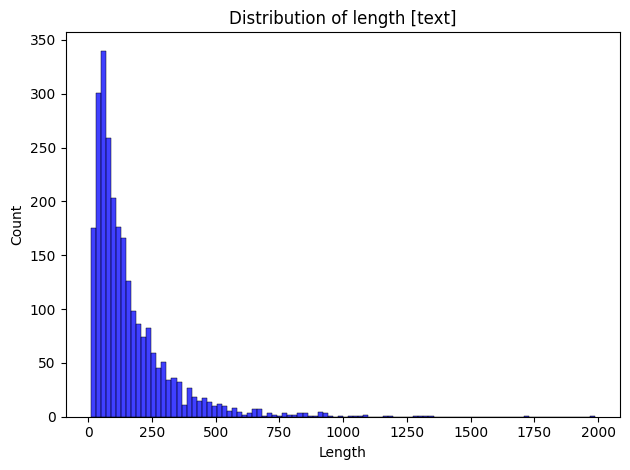

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6.4, 4.8))

# plt.hist(length, bins=50, color='blue', range=[0, 2000])
sns.histplot(reviews_length, bins=100, color='blue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of length [text]')

plt.tight_layout()
plt.show()

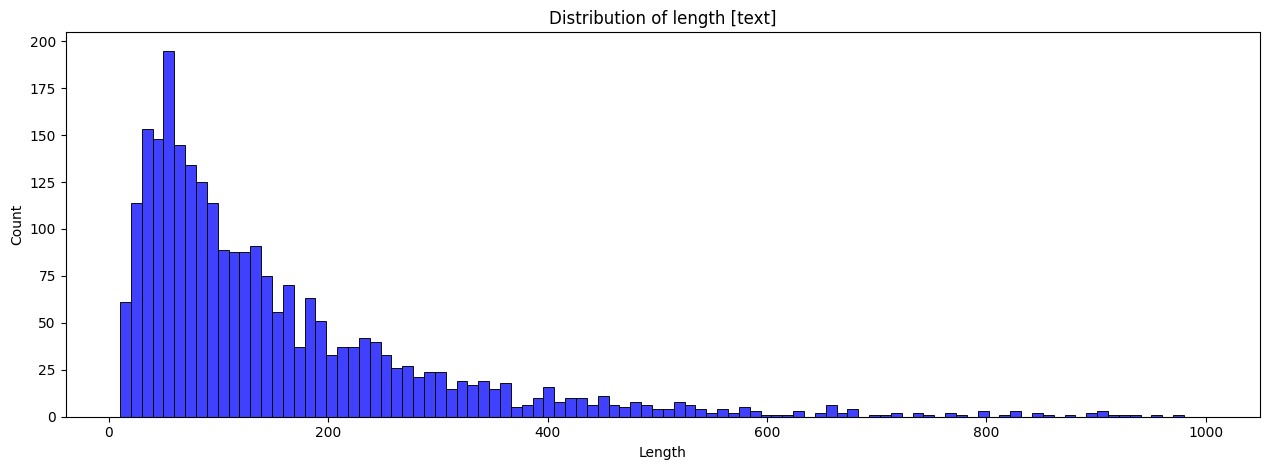

In [33]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(12.8, 4.8))

sns.histplot(reviews_length, bins=100, color='blue', binrange=[10, 1000])
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of length [text]')

plt.tight_layout()
plt.show()

## Normalizing labels

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded your DataFrame as 'df'
# df = ...

# List of output columns you want to convert
output_columns = ['Tangibles', 'Reliability', 'Empathy', 'Assurance', 'Responsiveness']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each output column
for col in output_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Print the updated DataFrame
df.head()

,reviews,Tangibles,Reliability,Empathy,Assurance,Responsiveness,reviews1
0,اتاق ها خیلی معمولی، پرسنل بی اعصاب، صبحانه مع...,1,3,4,0,3,اتاق‌ها خیلی معمولی پرسنل بی اعصاب صبحانه معمو...
1,هتل با توجه به قیمت و تبلیغات بالا راضی کننده...,0,0,4,0,3,هتل با توجه به قیمت و تبلیغات بالا راضی کننده ...
2,کارکنان بسیار خوب و مودب,3,3,4,2,3,کارکنان بسیار خوب و مودب
3,اتاقش خیلی خوب بود دلباز و تمیز، من چون گرمایی...,2,3,4,3,3,اتاقش خیلی خوب بود دلباز و تمیز من چون گرمایی ...
4,برخورد پرسنل هتل عالی بود.موسیقی زنده در کافی ...,2,3,4,2,3,برخورد پرسنل هتل عالی بودموسیقی زنده در کافی ش...


## distinct values of lables

In [35]:
import pandas as pd

# Assuming you have already loaded your DataFrame as 'df'
# df = ...

# List of output columns
output_columns = ['Tangibles', 'Reliability', 'Empathy', 'Assurance', 'Responsiveness']

# Count distinct values in each output column
distinct_counts = df[output_columns].nunique()

# Print the distinct value counts for each column
print("Distinct Value Counts in Each Output Column:")
for col, count in distinct_counts.items():
    print(f"{col}: {count}")


Distinct Value Counts in Each Output Column:
Tangibles: 4
Reliability: 4
Empathy: 5
Assurance: 4
Responsiveness: 5


# word2vec embedding

In [36]:
from gensim.models import Word2Vec

# Combine all the sentences from the 'article1' and 'summary1' columns
train_sentences = df['reviews1'].tolist()
# Convert the sentences to lists of words
train_sentences = [sentence.split() for sentence in train_sentences]

# Create a Word2Vec model
model = Word2Vec(train_sentences, vector_size=300, window=5, min_count=1, workers=4)

# Train the model
model.train(train_sentences, total_examples=model.corpus_count, epochs=30)

# Save the model
#model.save("word2vec.model")

(1915295, 2537100)

In [37]:
vocab_size = len(model.wv.key_to_index)

print(len(model.wv.key_to_index))

8292


## tokenizing and indexing

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer

# ساخت واژگان (vocabulary)
oov_tok='<oov>'
oov_token=oov_tok
tokenizer = Tokenizer(oov_token=oov_tok)#,num_words = vocab_size)
#tokenizer = Tokenizer(num_words = vocab_size)

tokenizer.fit_on_texts(df['reviews1'])
print(len(list(tokenizer.word_index.keys())))


8287


In [39]:
df['reviews_indices'] = tokenizer.texts_to_sequences(df['reviews1'])
sequences = tokenizer.texts_to_sequences(df['reviews1'])

word_index = tokenizer.word_index
df.head()

,reviews,Tangibles,Reliability,Empathy,Assurance,Responsiveness,reviews1,reviews_indices
0,اتاق ها خیلی معمولی، پرسنل بی اعصاب، صبحانه مع...,1,3,4,0,3,اتاق‌ها خیلی معمولی پرسنل بی اعصاب صبحانه معمو...,"[51, 16, 131, 18, 98, 1007, 14, 131, 5, 50, 3,..."
1,هتل با توجه به قیمت و تبلیغات بالا راضی کننده...,0,0,4,0,3,هتل با توجه به قیمت و تبلیغات بالا راضی کننده ...,"[3, 12, 67, 6, 56, 2, 2588, 116, 79, 295, 28, ..."
2,کارکنان بسیار خوب و مودب,3,3,4,2,3,کارکنان بسیار خوب و مودب,"[19, 13, 7, 2, 82]"
3,اتاقش خیلی خوب بود دلباز و تمیز، من چون گرمایی...,2,3,4,3,3,اتاقش خیلی خوب بود دلباز و تمیز من چون گرمایی ...,"[1332, 16, 7, 4, 771, 2, 32, 26, 108, 3596, 48..."
4,برخورد پرسنل هتل عالی بود.موسیقی زنده در کافی ...,2,3,4,2,3,برخورد پرسنل هتل عالی بودموسیقی زنده در کافی ش...,"[21, 18, 3, 11, 3597, 1091, 5, 112, 174, 2, 33..."


## distribution of tokens

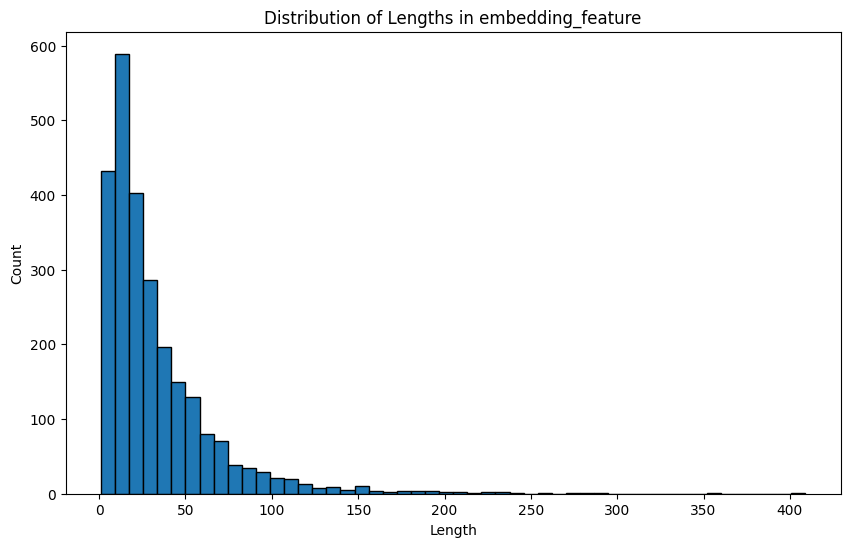

In [40]:
import matplotlib.pyplot as plt

# محاسبه طول هر مقدار در ستون
lengths = df['reviews_indices'].apply(len)

# رسم نمودار توزیع طول مقادیر
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Lengths in embedding_feature')
plt.show()

## setting some parameters

In [41]:
word_vectors = model.wv
vocab_size = len(word_vectors.key_to_index)
num_words=len(word_vectors.key_to_index)

embedding_dim = model.vector_size
print(embedding_dim)


300


## Padding the sequence of tokens

In [42]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
padding_type = 'post'  # Pad sequences at the end
truncating_type = 'post'  # Truncate sequences at the end
max_length = 200
# Padding sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)


## Splitting to train and test

In [43]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.05, random_state=42)
train_df.head()

,reviews,Tangibles,Reliability,Empathy,Assurance,Responsiveness,reviews1,reviews_indices
2137,برخورد پرسنل عالی بود، قطعا از انتخاب خودتون پ...,3,3,4,2,3,برخورد پرسنل عالی بود قطعا از انتخاب خودتون پش...,"[21, 18, 11, 4, 677, 8, 100, 1010, 1642, 7629]"
1334,عالی صبونه هتل خ خوب بود و موزیک زنده هم تو صب...,2,3,4,3,3,عالی صبونه هتل خ خوب بود و موزیک زنده هم تو صب...,"[11, 2502, 3, 1997, 7, 4, 2, 1258, 1091, 15, 1..."
2068,در کل خوب بود پارکینگ داره یه مزیته,2,3,4,3,3,در کل خوب بود پارکینگ داره یه مزیته,"[5, 50, 7, 4, 150, 77, 75, 2863]"
1833,من ۴ روز رزرو کرده بودم، روز اول که رسیدم یه ا...,0,3,4,3,3,من ۴ روز رزرو کرده بودم روز اول که رسیدم یه ات...,"[26, 88, 66, 136, 217, 83, 66, 184, 9, 2429, 7..."
194,همه موارد عالی بود، ولی حیف که به علت کرونا ا...,0,3,4,3,3,همه موارد عالی بود ولی حیف که به علت کرونا است...,"[24, 219, 11, 4, 23, 1043, 9, 6, 395, 139, 129..."


# Building the model

In [51]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional
from keras.models import Model
# encoder input model
inputs = Input(shape=(max_length,))
#encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim)(inputs)
encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)
encoder2 = LSTM(256, return_sequences=True)(encoder1)  # Add return_sequences=True
# Bidirectional LSTM layer
encoder2_bilstm = Bidirectional(LSTM(128))(encoder2)

#outputs= Dense(5, activation='softmax')
# Define output layers for each sentiment column
output_layers = []
for col in output_columns:
    if col=='Tangibles' or col=='Reliability'or col=='Assurance' :
      x=4
    elif col=='Empathy' or col=='Responsiveness':
      x=5
    output_layer1 = Dense(64, activation='relu')(encoder2_bilstm)
    output_layer2 = Dense(32, activation='relu')(output_layer1)
    output_layer = Dense(x, activation='softmax', name=col)(output_layer2)
    #output_layer = Dense(x, activation='softmax', name=col)(encoder2_bilstm) #label_encoder.classes_.shape[0]

    output_layers.append(output_layer)

# Tie it together
model = Model(inputs=inputs, outputs=output_layers)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 200, 300)     2487600     ['input_2[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, 200, 256)     570368      ['embedding_1[0][0]']            
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 256)         394240      ['lstm_2[0][0]']                 
 )                                                                                          

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert your text data to sequences and pad them
padding_type = 'post'  # Pad sequences at the end
truncating_type = 'post'  # Truncate sequences at the end
max_length = 200
# Padding sequences
# Assuming you have already defined a tokenizer
input_column="reviews1"
train_sequences = tokenizer.texts_to_sequences(train_df[input_column])
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
test_sequences = tokenizer.texts_to_sequences(test_df[input_column])
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, [train_df[col] for col in output_columns],
                    epochs=100, batch_size=512, validation_split=0.10,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, [test_df[col] for col in output_columns])



Epoch 1/100
5/5 [==============================] - 14s 567ms/step - loss: 6.7351 - Tangibles_loss: 1.2771 - Reliability_loss: 1.2823 - Empathy_loss: 1.2914 - Assurance_loss: 1.2855 - Responsiveness_loss: 1.5987 - Tangibles_accuracy: 0.3536 - Reliability_accuracy: 0.4616 - Empathy_accuracy: 0.5508 - Assurance_accuracy: 0.4318 - Responsiveness_accuracy: 0.2242 - val_loss: 4.8352 - val_Tangibles_loss: 1.0965 - val_Reliability_loss: 0.9888 - val_Empathy_loss: 0.4559 - val_Assurance_loss: 1.0067 - val_Responsiveness_loss: 1.2874 - val_Tangibles_accuracy: 0.4239 - val_Reliability_accuracy: 0.7531 - val_Empathy_accuracy: 0.9794 - val_Assurance_accuracy: 0.5802 - val_Responsiveness_accuracy: 0.7449
Epoch 2/100
5/5 [==============================] - 1s 232ms/step - loss: 4.3246 - Tangibles_loss: 1.0411 - Reliability_loss: 0.8513 - Empathy_loss: 0.3328 - Assurance_loss: 0.9760 - Responsiveness_loss: 1.1235 - Tangibles_accuracy: 0.4488 - Reliability_accuracy: 0.7914 - Empathy_accuracy: 0.9643 - A

In [59]:
# Evaluate the model
evaluation_results = model.evaluate(test_padded_sequences, [test_df[col] for col in output_columns])

# Print the evaluation results
print("Evaluation Results:")
print(f"Total Loss: {evaluation_results[0]}")
for i, col in enumerate(output_columns):
    print(f"{col} Accuracy: {round(evaluation_results[i+6]*100,2)}%")

4/4 [==============================] - 0s 35ms/step - loss: 2.6701 - Tangibles_loss: 0.7932 - Reliability_loss: 0.5695 - Empathy_loss: 0.3036 - Assurance_loss: 0.5087 - Responsiveness_loss: 0.4951 - Tangibles_accuracy: 0.7266 - Reliability_accuracy: 0.7812 - Empathy_accuracy: 0.9375 - Assurance_accuracy: 0.8047 - Responsiveness_accuracy: 0.8438
Evaluation Results:
Total Loss: 2.670078992843628
Tangibles Accuracy: 72.66%
Reliability Accuracy: 78.12%
Empathy Accuracy: 93.75%
Assurance Accuracy: 80.47%
Responsiveness Accuracy: 84.38%


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
predictions = model.predict(test_padded_sequences)

# Iterate through output columns
for i, col in enumerate(output_columns):
    true_labels = test_df[col]
    pred_labels = np.argmax(predictions[i], axis=1)  # Convert probabilities to class labels
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')

    print(f"Metrics for {col}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


4/4 [==============================] - 1s 21ms/step
Metrics for Tangibles:
Accuracy: 0.7266, Precision: 0.7092, Recall: 0.7266, F1-score: 0.7026
Metrics for Reliability:
Accuracy: 0.7812, Precision: 0.6213, Recall: 0.7812, F1-score: 0.6922
Metrics for Empathy:
Accuracy: 0.9375, Precision: 0.8789, Recall: 0.9375, F1-score: 0.9073
Metrics for Assurance:
Accuracy: 0.8047, Precision: 0.7947, Recall: 0.8047, F1-score: 0.7846
Metrics for Responsiveness:
Accuracy: 0.8438, Precision: 0.8259, Recall: 0.8438, F1-score: 0.7862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


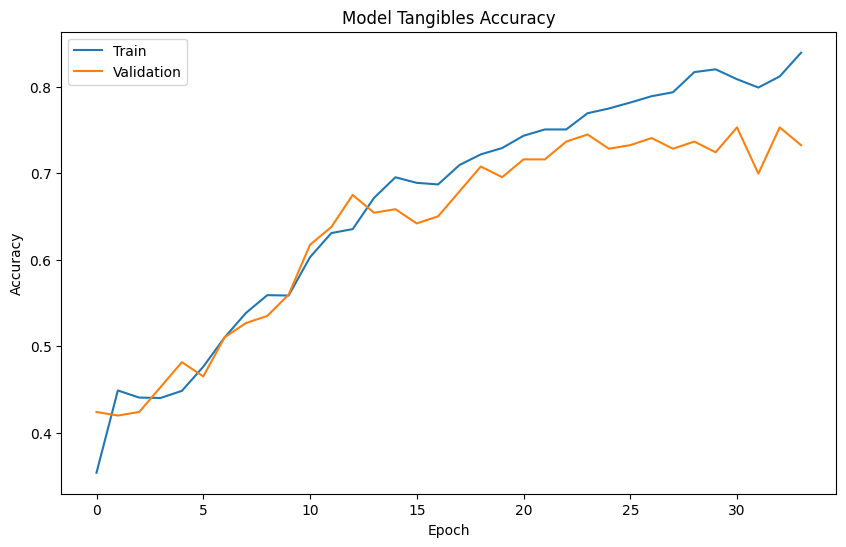

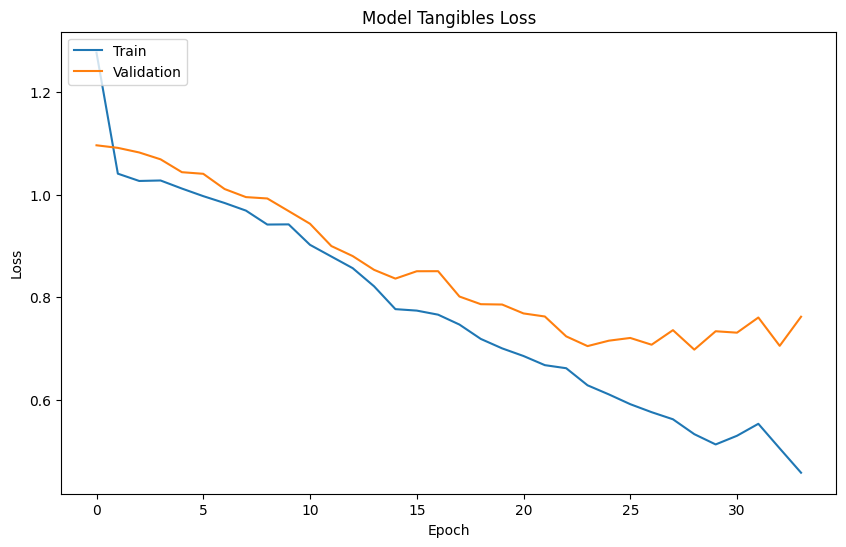

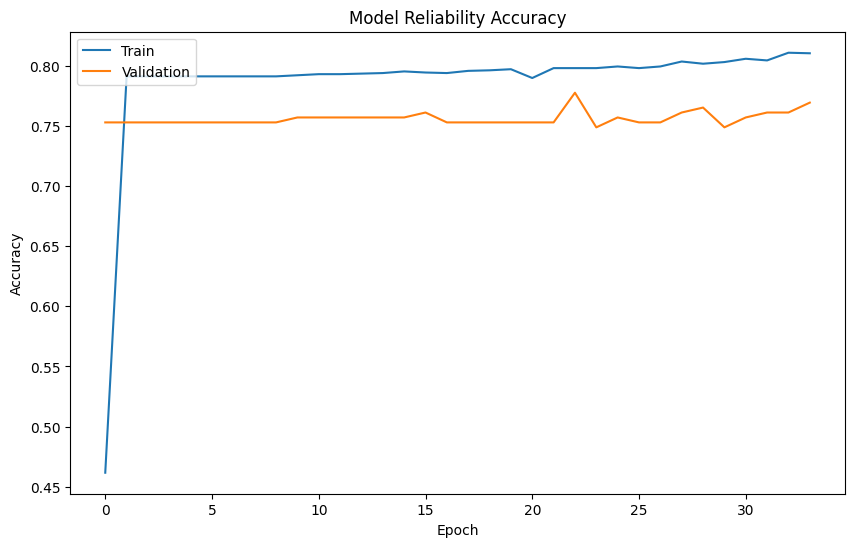

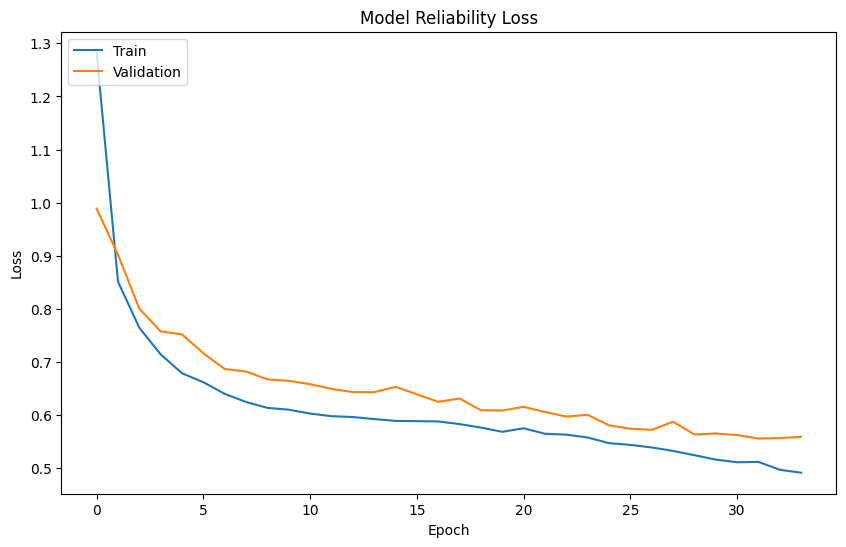

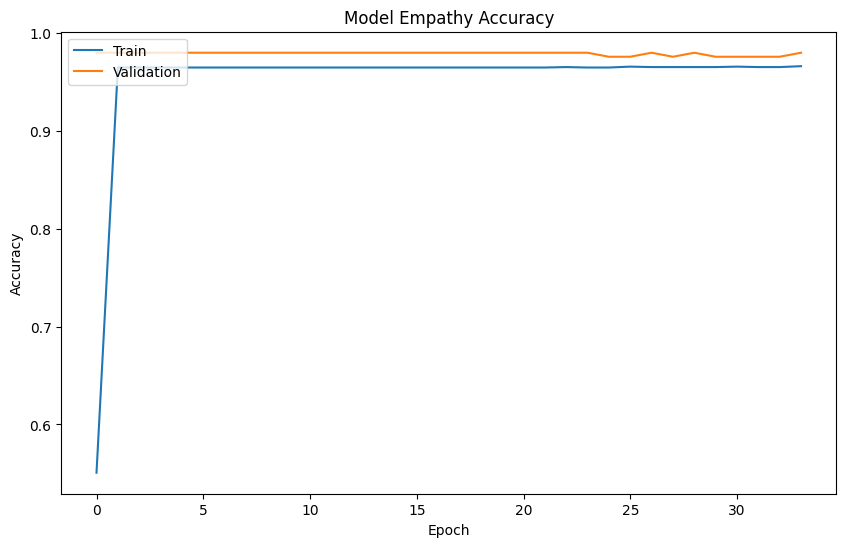

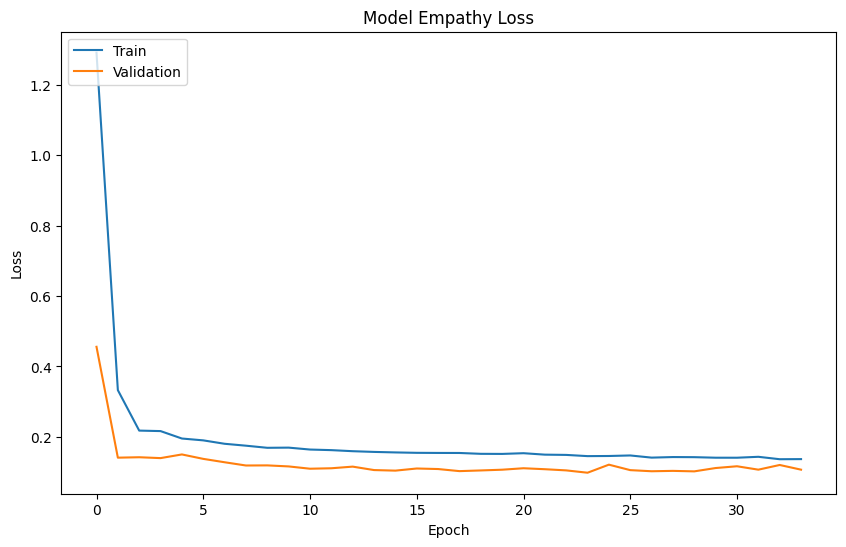

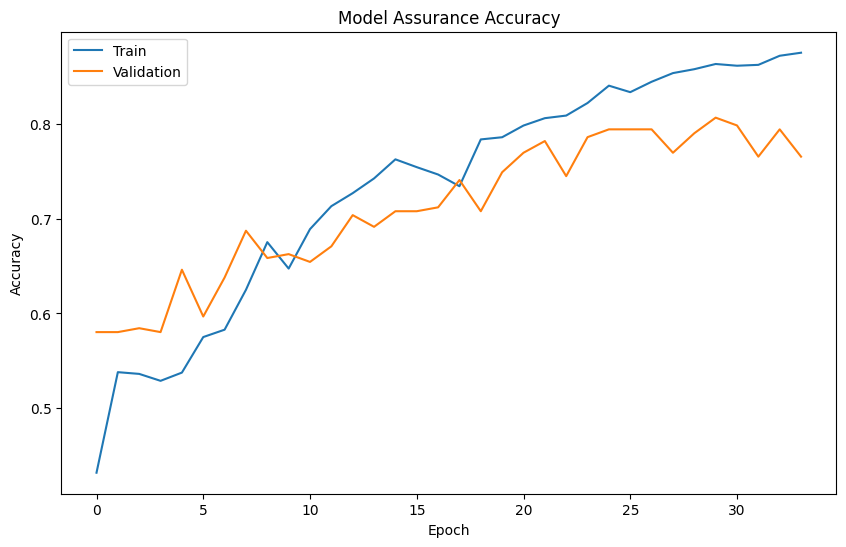

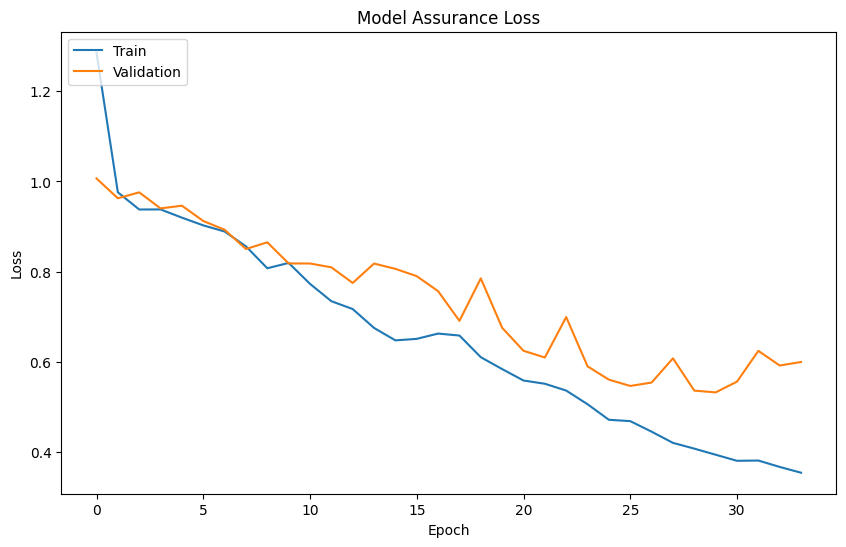

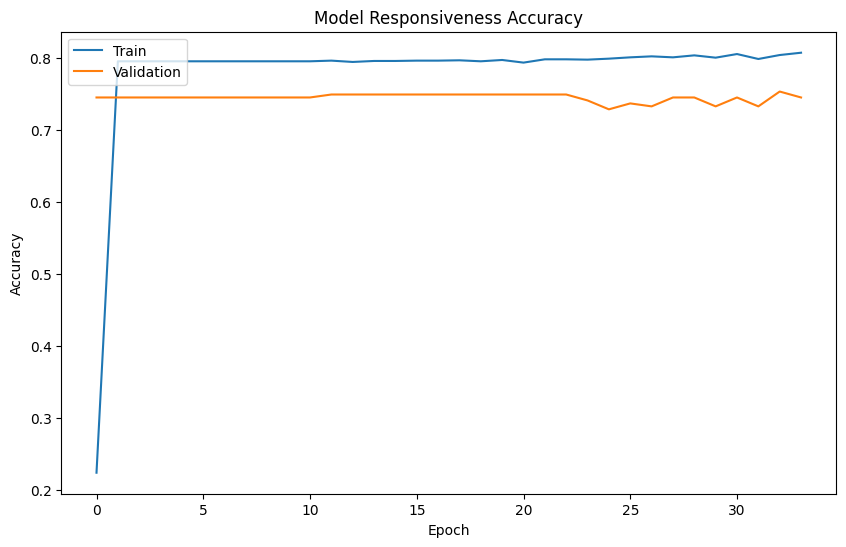

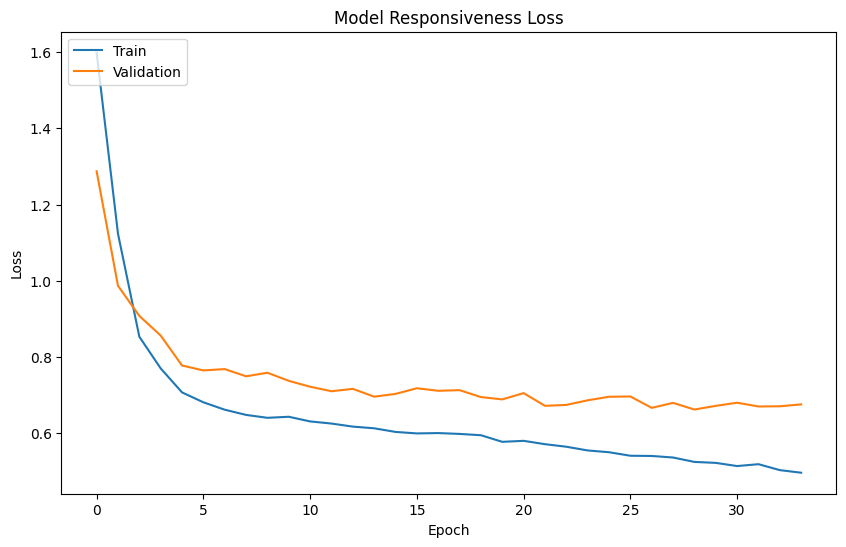

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for each output column
for i, col in enumerate(output_columns):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[f'{col}_accuracy'])
    plt.plot(history.history[f'val_{col}_accuracy'])
    plt.title(f'Model {col} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values for each output column
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[f'{col}_loss'])
    plt.plot(history.history[f'val_{col}_loss'])
    plt.title(f'Model {col} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


# another model

In [102]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional,Dropout
from keras.models import Model
# encoder input model
inputs = Input(shape=(max_length,))
#encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim)(inputs)
encoder1 = Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[word_vectors.vectors], trainable=False)(inputs)
encoder2 = LSTM(128, return_sequences=True)(encoder1)  # Add return_sequences=True
# Bidirectional LSTM layer
encoder2_bilstm = Bidirectional(LSTM(64))(encoder2)

#outputs= Dense(5, activation='softmax')
# Define output layers for each sentiment column
output_layers = []
for col in output_columns:
    if col=='Tangibles' or col=='Reliability'or col=='Assurance' :
      x=4
    elif col=='Empathy' or col=='Responsiveness':
      x=5
    if col=='Tangibles':
      output_layer1 = Dense(64, activation='relu')(encoder2_bilstm)
      dropout_layer1 = Dropout(0.1)(output_layer1)  # Add dropout
      output_layer2 = Dense(32, activation='relu')(dropout_layer1)
      #dropout_layer2 = Dropout(0.1)(output_layer2)
      #output_layer3 = Dense(16, activation='relu')(dropout_layer2)
      #dropout_layer3 = Dropout(1/16)(output_layer3)
      #output_layer4 = Dense(8, activation='relu')(dropout_layer3)
      last_layer = Dropout(1/8)(dropout_layer1)
    elif col=='Empathy':
      output_layer1 = Dense(32, activation='relu')(encoder2_bilstm)
      dropout_layer1 = Dropout(0.25)(output_layer1)  # Add dropout
      output_layer2 = Dense(16, activation='relu')(dropout_layer1)
      last_layer = Dropout(0.25)(output_layer2)
      #output_layer3 = Dense(16, activation='relu')(dropout_layer2)
      #dropout_layer3 = Dropout(1/16)(output_layer3)
      #output_layer4 = Dense(8, activation='relu')(dropout_layer3)
      #dropout_layer4 = Dropout(1/8)(output_layer4)
    elif col=='Reliability':
      output_layer1 = Dense(32, activation='relu')(encoder2_bilstm)
      dropout_layer1 = Dropout(0.25)(output_layer1)  # Add dropout
      output_layer2 = Dense(16, activation='relu')(dropout_layer1)
      last_layer = Dropout(0.25)(output_layer2)
      #output_layer3 = Dense(16, activation='relu')(dropout_layer2)
      #dropout_layer3 = Dropout(1/16)(output_layer3)
      #output_layer4 = Dense(8, activation='relu')(dropout_layer3)
      #dropout_layer4 = Dropout(1/8)(output_layer4)
    elif col=='Responsiveness':
      output_layer1 = Dense(32, activation='relu')(encoder2_bilstm)
      dropout_layer1 = Dropout(0.25)(output_layer1)  # Add dropout
      output_layer2 = Dense(16, activation='relu')(dropout_layer1)
      dropout_layer2 = Dropout(0.25)(output_layer2)
      output_layer3 = Dense(16, activation='relu')(dropout_layer2)
      dropout_layer3 = Dropout(1/16)(output_layer3)
      output_layer4 = Dense(8, activation='relu')(dropout_layer3)
      dropout_layer4 = Dropout(1/8)(output_layer4)
    else:
      output_layer1 = Dense(64, activation='relu')(encoder2_bilstm)
      dropout_layer1 = Dropout(1/16)(output_layer1)  # Add dropout
      output_layer2 = Dense(32, activation='relu')(dropout_layer1)
      last_layer = Dropout(1/8)(output_layer2)
      #output_layer3 = Dense(16, activation='relu')(dropout_layer2)
      #dropout_layer3 = Dropout(1/16)(output_layer3)
      #output_layer4 = Dense(8, activation='relu')(dropout_layer3)
      #dropout_layer4 = Dropout(1/8)(output_layer4)

    output_layer = Dense(x, activation='softmax', name=col)(last_layer)
    #output_layer = Dense(x, activation='softmax', name=col)(encoder2_bilstm) #label_encoder.classes_.shape[0]

    output_layers.append(output_layer)

# Tie it together
model = Model(inputs=inputs, outputs=output_layers)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 200, 300)     2487600     ['input_9[0][0]']                
                                                                                                  
 lstm_16 (LSTM)                 (None, 200, 128)     219648      ['embedding_8[0][0]']            
                                                                                                  
 bidirectional_8 (Bidirectional  (None, 128)         98816       ['lstm_16[0][0]']                
 )                                                                                          

In [103]:
from keras.optimizers import Adam, RMSprop
#optimizer = Adam(lr=0.001)
optimizer = RMSprop(lr=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Convert your text data to sequences and pad them
padding_type = 'post'  # Pad sequences at the end
truncating_type = 'post'  # Truncate sequences at the end
max_length = 200
# Padding sequences
# Assuming you have already defined a tokenizer
input_column="reviews1"
train_sequences = tokenizer.texts_to_sequences(train_df[input_column])
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
test_sequences = tokenizer.texts_to_sequences(test_df[input_column])
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

# Train the model
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_padded_sequences, [train_df[col] for col in output_columns],
                    epochs=100, batch_size=512, validation_split=0.10,
                    callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(test_padded_sequences, [test_df[col] for col in output_columns])



Epoch 1/100
5/5 [==============================] - 11s 607ms/step - loss: 6.6235 - Tangibles_loss: 1.2715 - Reliability_loss: 1.0757 - Empathy_loss: 1.3672 - Assurance_loss: 1.3319 - Responsiveness_loss: 1.5772 - Tangibles_accuracy: 0.3637 - Reliability_accuracy: 0.6619 - Empathy_accuracy: 0.5252 - Assurance_accuracy: 0.3307 - Responsiveness_accuracy: 0.2232 - val_loss: 5.3557 - val_Tangibles_loss: 1.1152 - val_Reliability_loss: 0.8347 - val_Empathy_loss: 0.7964 - val_Assurance_loss: 1.2164 - val_Responsiveness_loss: 1.3929 - val_Tangibles_accuracy: 0.4239 - val_Reliability_accuracy: 0.7531 - val_Empathy_accuracy: 0.9794 - val_Assurance_accuracy: 0.4938 - val_Responsiveness_accuracy: 0.7449
Epoch 2/100
5/5 [==============================] - 1s 119ms/step - loss: 5.2246 - Tangibles_loss: 1.0720 - Reliability_loss: 0.8946 - Empathy_loss: 0.8138 - Assurance_loss: 1.1661 - Responsiveness_loss: 1.2781 - Tangibles_accuracy: 0.4529 - Reliability_accuracy: 0.7447 - Empathy_accuracy: 0.8184 - A

In [105]:
# Evaluate the model
evaluation_results = model.evaluate(test_padded_sequences, [test_df[col] for col in output_columns])

# Print the evaluation results
print("Evaluation Results:")
print(f"Total Loss: {evaluation_results[0]}")
for i, col in enumerate(output_columns):
    print(f"{col} Accuracy: {round(evaluation_results[i+6]*100,2)}%")

4/4 [==============================] - 0s 26ms/step - loss: 2.8061 - Tangibles_loss: 0.7985 - Reliability_loss: 0.6098 - Empathy_loss: 0.3249 - Assurance_loss: 0.5460 - Responsiveness_loss: 0.5269 - Tangibles_accuracy: 0.7266 - Reliability_accuracy: 0.7891 - Empathy_accuracy: 0.9375 - Assurance_accuracy: 0.8203 - Responsiveness_accuracy: 0.8438
Evaluation Results:
Total Loss: 2.8060719966888428
Tangibles Accuracy: 72.66%
Reliability Accuracy: 78.91%
Empathy Accuracy: 93.75%
Assurance Accuracy: 82.03%
Responsiveness Accuracy: 84.38%


last model results:


*   Tangibles Accuracy: 0.7266, Precision: 0.7092, Recall: 0.7266, F1-score: 0.7026
*   Reliability Accuracy: 0.7812, Precision: 0.6213, Recall: 0.7812, F1-score: 0.6922


*   Empathy Accuracy: 0.9375, Precision: 0.8789, Recall: 0.9375, F1-score: 0.9073





*   Assurance Accuracy: 0.8047, Precision: 0.7947, Recall: 0.8047, F1-score: 0.7846

*   Responsiveness Accuracy: 0.8438, Precision: 0.8259, Recall: 0.8438, F1-score: 0.7862







In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict on test data
predictions = model.predict(test_padded_sequences)

# Iterate through output columns
for i, col in enumerate(output_columns):
    true_labels = test_df[col]
    pred_labels = np.argmax(predictions[i], axis=1)  # Convert probabilities to class labels
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')

    print(f"Metrics for {col}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


4/4 [==============================] - 2s 21ms/step
Metrics for Tangibles:
Accuracy: 0.7266, Precision: 0.6974, Recall: 0.7266, F1-score: 0.7066
Metrics for Reliability:
Accuracy: 0.7891, Precision: 0.6226, Recall: 0.7891, F1-score: 0.6960
Metrics for Empathy:
Accuracy: 0.9375, Precision: 0.8789, Recall: 0.9375, F1-score: 0.9073
Metrics for Assurance:
Accuracy: 0.8203, Precision: 0.8016, Recall: 0.8203, F1-score: 0.8021
Metrics for Responsiveness:
Accuracy: 0.8438, Precision: 0.7119, Recall: 0.8438, F1-score: 0.7722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

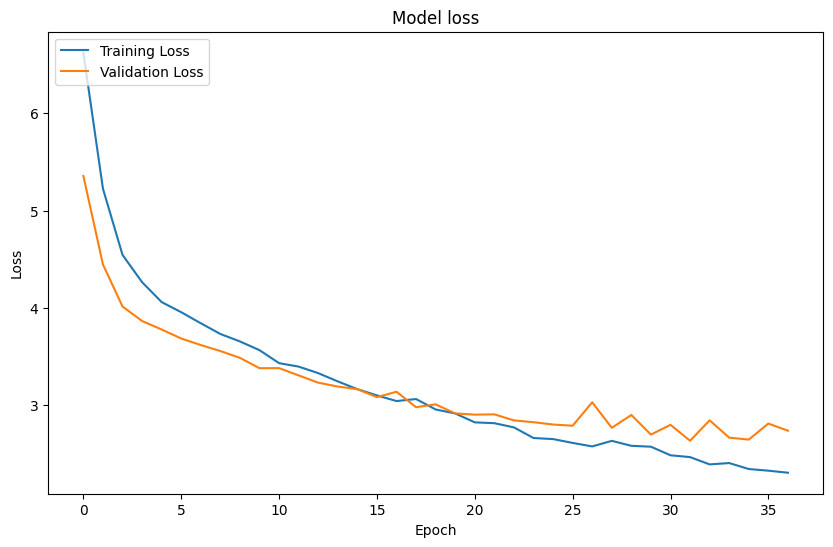

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()


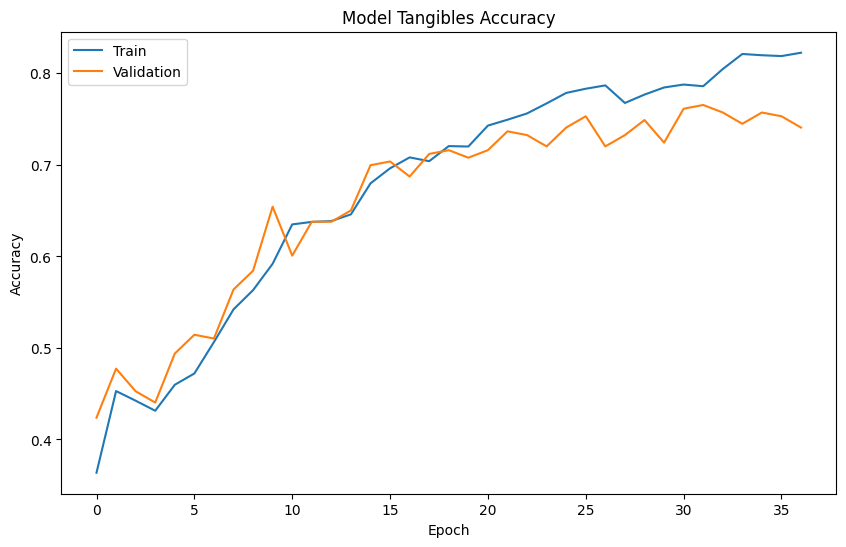

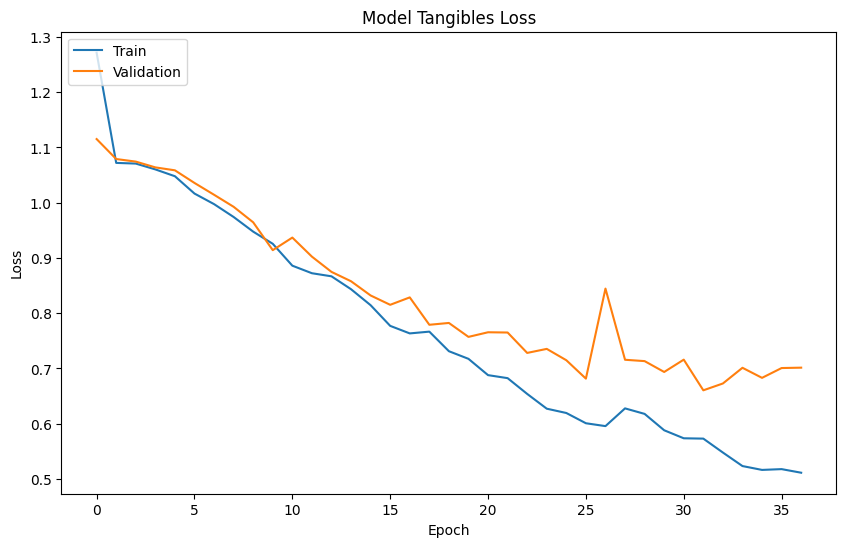

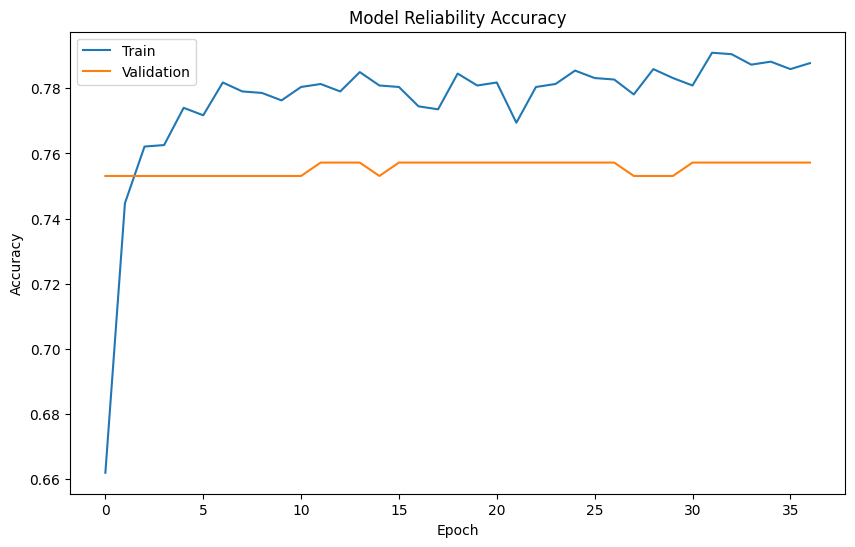

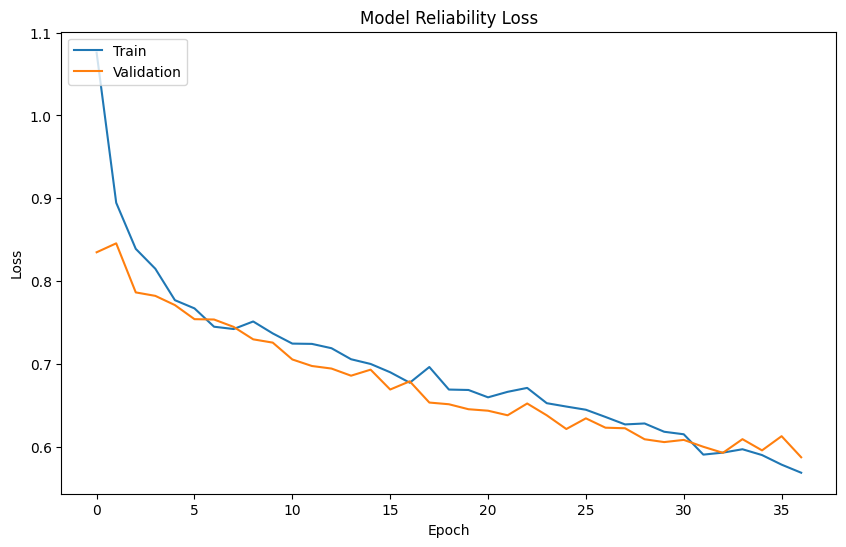

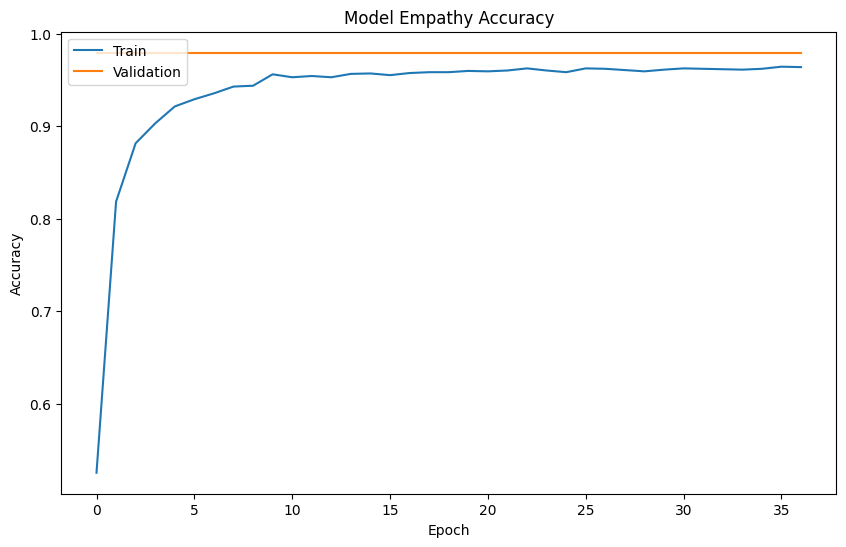

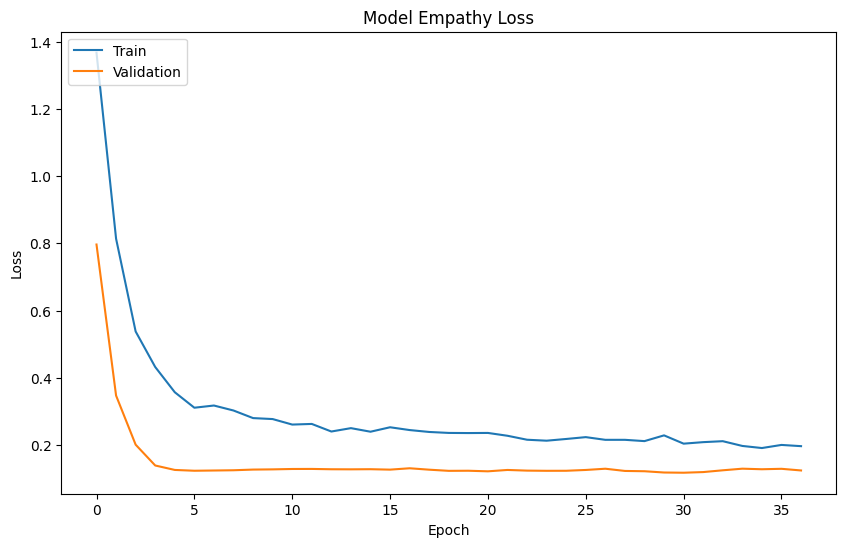

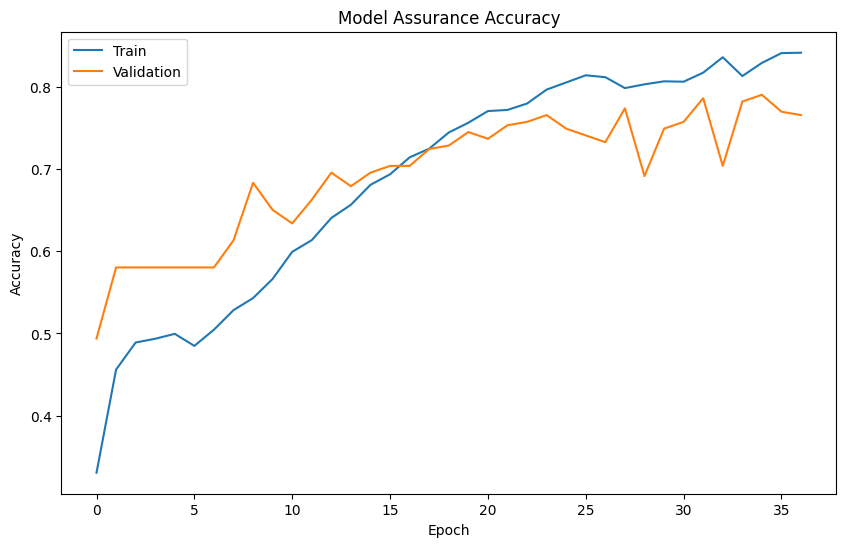

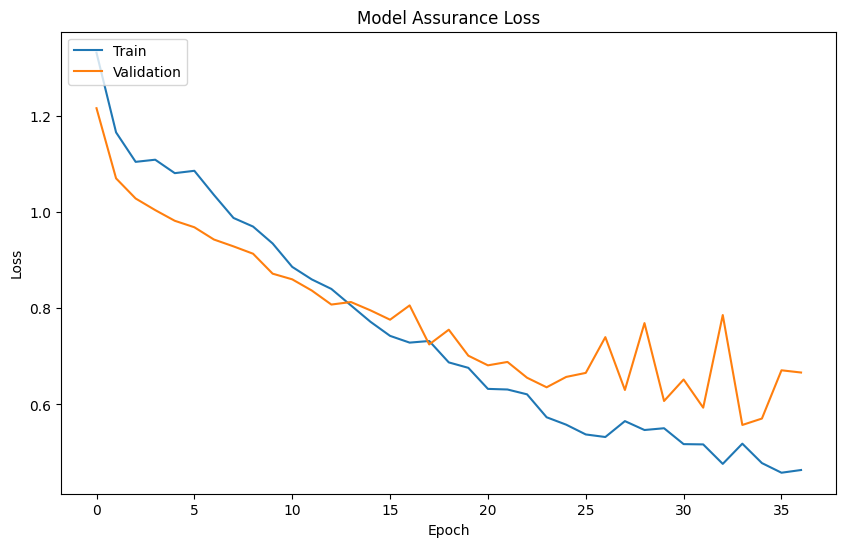

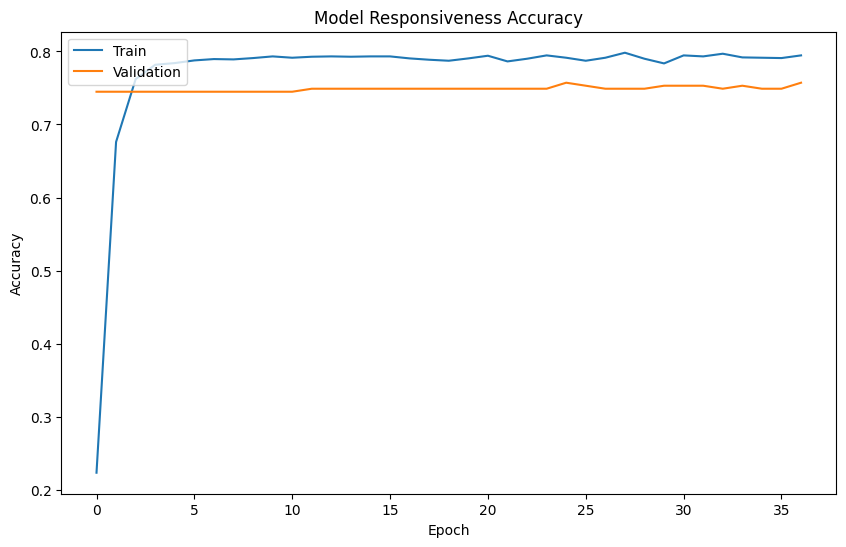

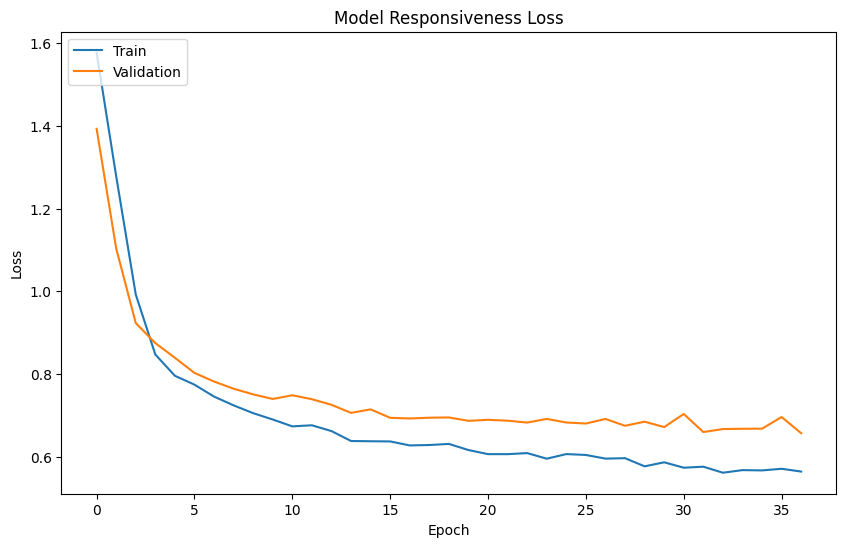

In [107]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for each output column
for i, col in enumerate(output_columns):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[f'{col}_accuracy'])
    plt.plot(history.history[f'val_{col}_accuracy'])
    plt.title(f'Model {col} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values for each output column
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[f'{col}_loss'])
    plt.plot(history.history[f'val_{col}_loss'])
    plt.title(f'Model {col} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
